In [157]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd

In [158]:
# Perform some basic preprocessing during dataframe retrieval
#  - screen out any duplication
#  - no other preprocessing

df_original = vv.quick_data(no_cuts=True, numeric_values_only=False, nans_forbidden=False, remove_duplicates=True, publish=True)

print(df_original.shape)
df_original.head()

remove duplicates: 20925/29984/22089/24047 ==> 20925/20520/18445/20297
20255
==> 20255
dataframe length: 20255
(20255, 146)


,Description,Price,add_info,date_scraped,distance_to_any_train,type,bedrooms,bathrooms,size,other_key_info,...,analyticsProperty.propertyType,analyticsProperty.retirement,analyticsProperty.selectedCurrency,analyticsProperty.selectedPrice,analyticsProperty.soldSTC,analyticsProperty.videoProvider,analyticsProperty.viewType,Unnamed: 46,floorplan_count,borough_name
ids,,,,,,,,,,,,,,,,,,,,,
119380301,1 bedroom apartment for sale,585000.0,"Added on 01/02/2022 by MyLondonHome, Central L...",2022-07-03 19:38:39,0.4,Apartment,1.0,1.0,539 sq. ft.;(50 sq. m.),NaN,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,NaN,Hounslow
85089531,3 bedroom semi-detached house for sale,585000.0,"Reduced on 01/07/2022 by Stirling Ackroyd, Whi...",2022-07-03 19:38:40,0.6,Semi-Detached,3.0,1.0,NaN,NaN,...,Houses,False,NaN,NaN,False,No Video,Current,NaN,NaN,Hounslow
122728412,4 bedroom semi-detached house for sale,585000.0,"Added on 22/04/2022 by Foxtons, Covering Hounslow",2022-07-03 19:38:40,0.5,Semi-Detached,4.0,1.0,"1,912 sq. ft.;(178 sq. m.)",NaN,...,Houses,False,NaN,NaN,False,No Video,Current,NaN,NaN,Hounslow
123588773,4 bedroom flat for sale,585000.0,"Added on 23/05/2022 by Rolfe East, Acton",2022-07-03 19:38:40,0.6,Flat,4.0,1.0,NaN,NaN,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,NaN,Hounslow
96584980,2 bedroom apartment for sale,585000.0,"Added on 19/05/2022 by JOHNS&CO, Brentford",2022-07-03 19:38:40,0.4,Apartment,2.0,2.0,NaN,NaN,...,Flats / Apartments,False,NaN,NaN,False,No Video,Current,NaN,NaN,Hounslow


In [159]:
columns = df_original.columns
i = -1
import matplotlib.pyplot as plt

columns

Index(['Description', 'Price', 'add_info', 'date_scraped',
       'distance_to_any_train', 'type', 'bedrooms', 'bathrooms', 'size',
       'other_key_info',
       ...
       'analyticsProperty.propertyType', 'analyticsProperty.retirement',
       'analyticsProperty.selectedCurrency', 'analyticsProperty.selectedPrice',
       'analyticsProperty.soldSTC', 'analyticsProperty.videoProvider',
       'analyticsProperty.viewType', 'Unnamed: 46', 'floorplan_count',
       'borough_name'],
      dtype='object', length=146)

In [160]:
i = -1


def next_histogram():
    global i

    values = len(df_original[columns[i]].unique())

    skipped = []
    while values < 3 or values > 50:  #if values <= 150:
        skipped.append(columns[i] + "(" + str(values)+ ")")
        i = i + 1
        values = len(df_original[columns[i]].unique())

    if skipped:
        print(f'skipping {"/".join(skipped)}: too many value types or not enough value types')
        print()

    print(i, columns[i], df_original[columns[i]].dtype, values)

    try:
        #df_original[columns[i]].hist(figsize=(20, 8), bins=20)
        df_original[columns[i]].hist(figsize=(20, 8))
        if values > 15:
            plt.xticks(rotation=45)
        plt.show()
    except:
        print("failed to load graph")

skipping Description(124)/Price(1069)/add_info(16122)/date_scraped(2002): too many value types or not enough value types

4 distance_to_any_train float64 43


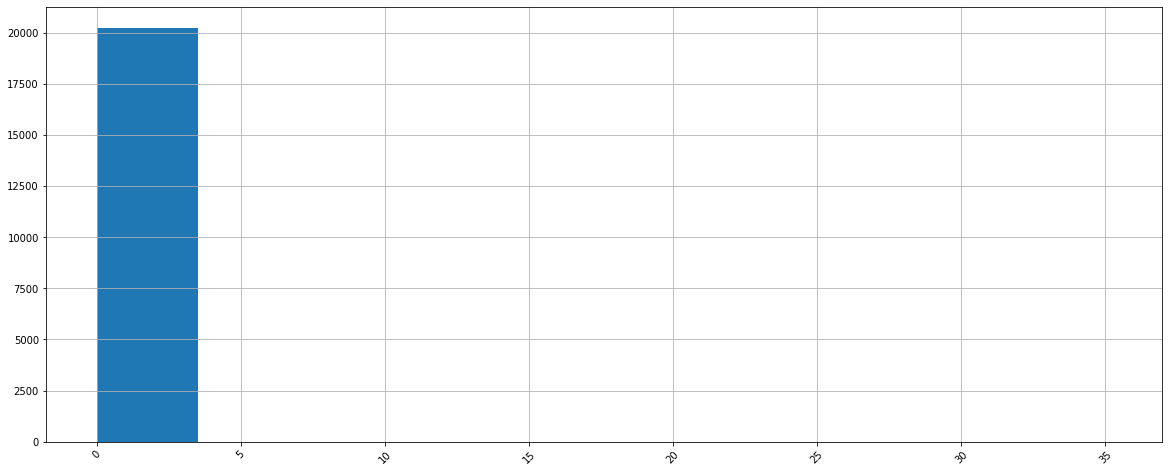

In [161]:
i = (i + 1) % len(columns)
next_histogram()

5 type object 39


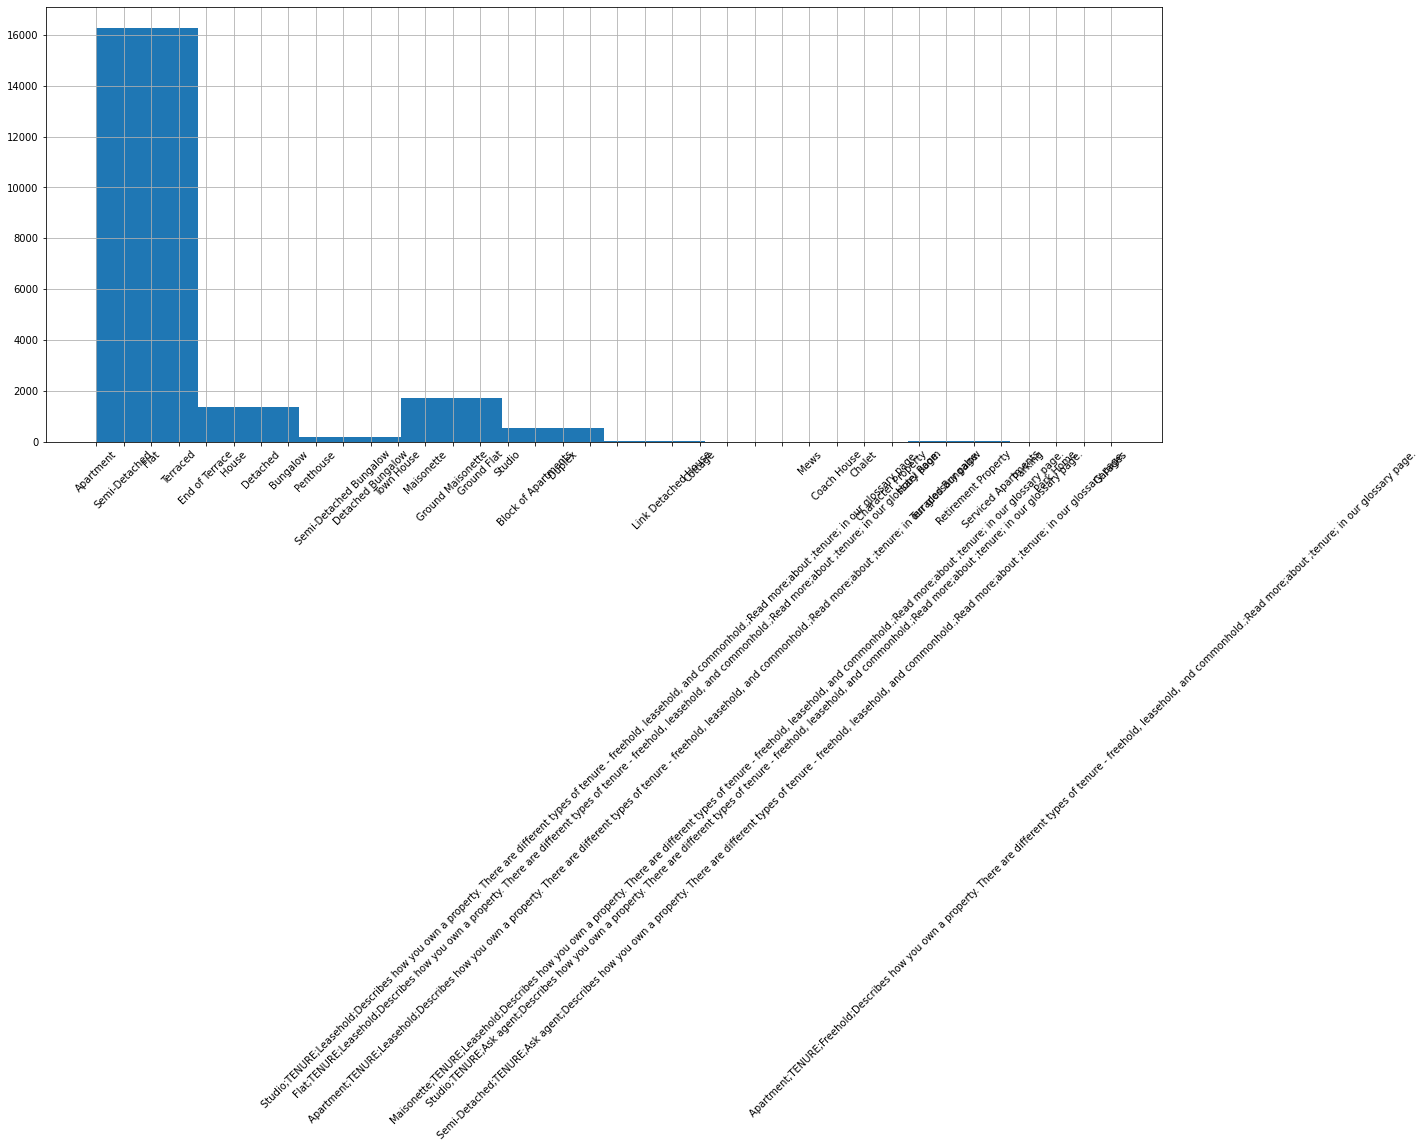

In [162]:
i = (i + 1) % len(columns)
next_histogram()

6 bedrooms float64 10


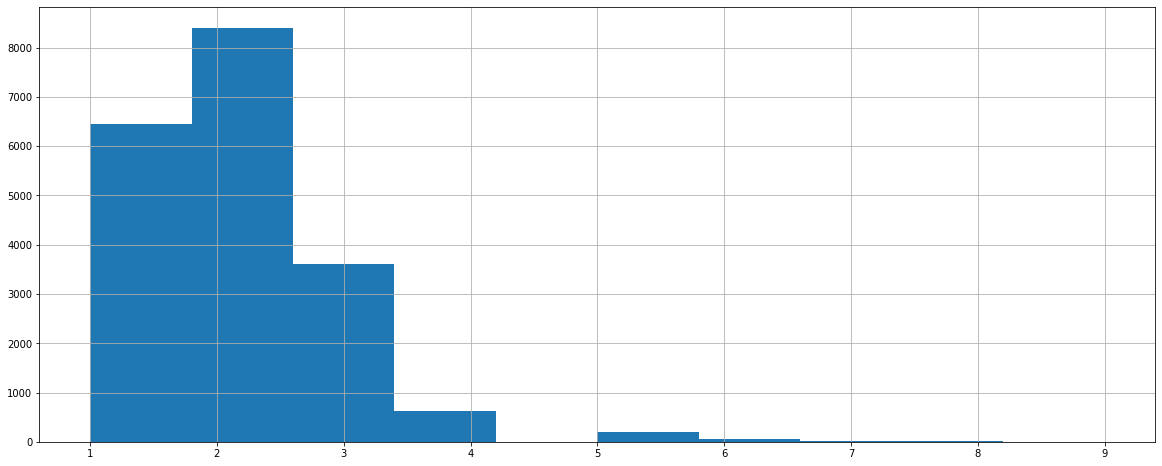

In [163]:
i = (i + 1) % len(columns)
next_histogram()

7 bathrooms float64 11


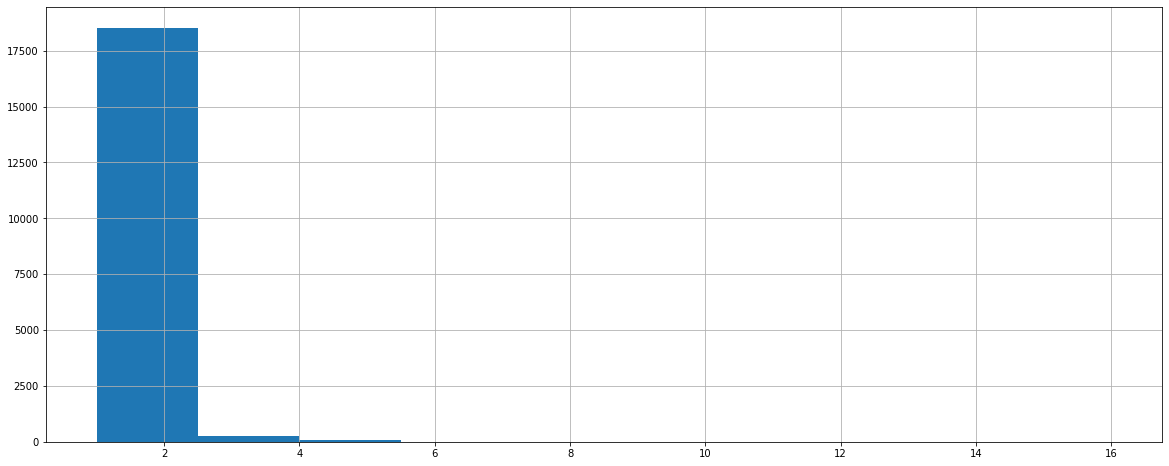

In [164]:
i = (i + 1) % len(columns)
next_histogram()

skipping size(1225)/other_key_info(2)/bullet_points(17839)/station_info(11825): too many value types or not enough value types

12 hold_type object 4


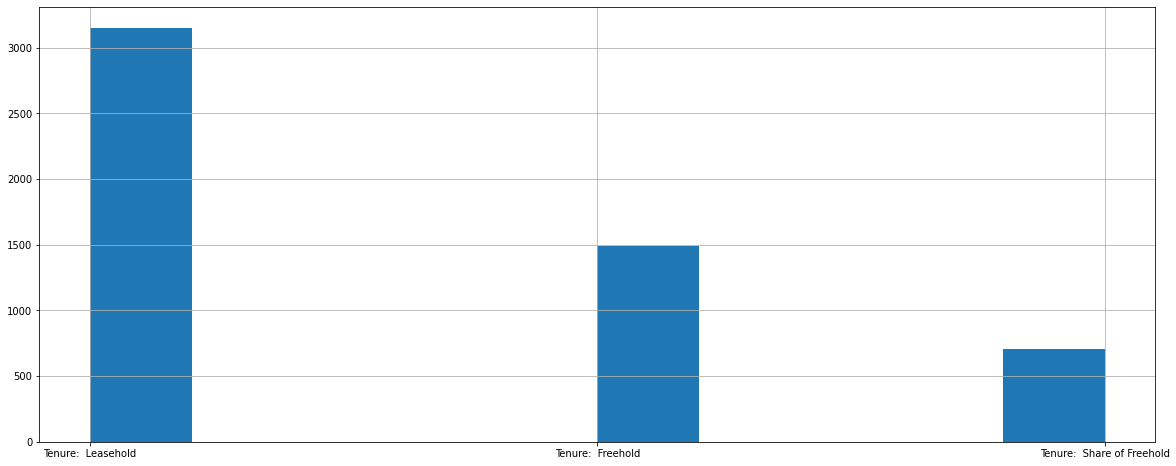

In [165]:
i = (i + 1) % len(columns)
next_histogram()

skipping short_description(1095)/long_description(20042)/date_scraped_listing(20121)/keyFeatures(16108)/images(18367)/virtualTours(4726)/industryAffiliations(54)/rooms(2071)/nearestAirports(2)/nearestStations(16382)/showSchoolInfo(2)/countryGuide(1): too many value types or not enough value types

25 channel object 3


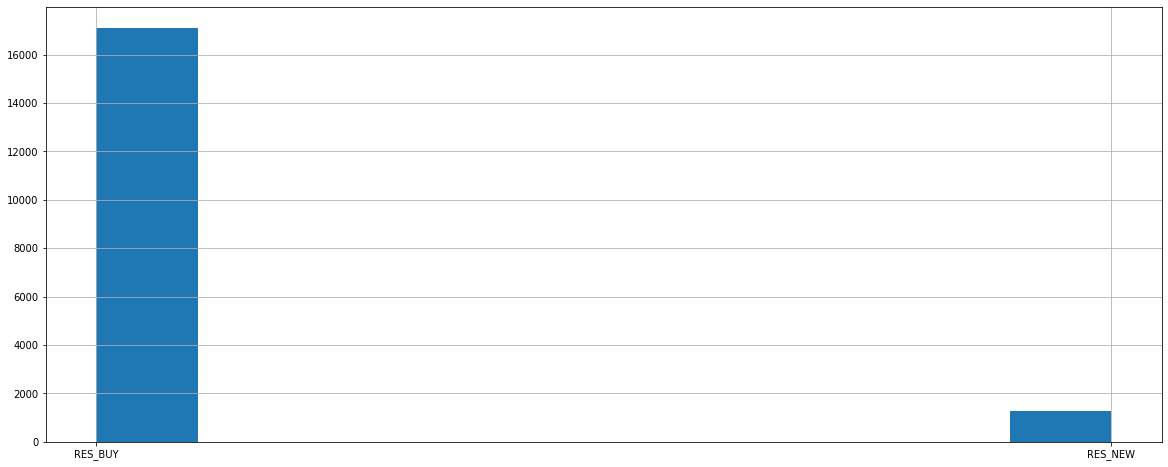

In [166]:
i = (i + 1) % len(columns)
next_histogram()

skipping sizings(2547)/brochures(12968)/epcGraphs(13117): too many value types or not enough value types

29 bedrooms_model float64 10


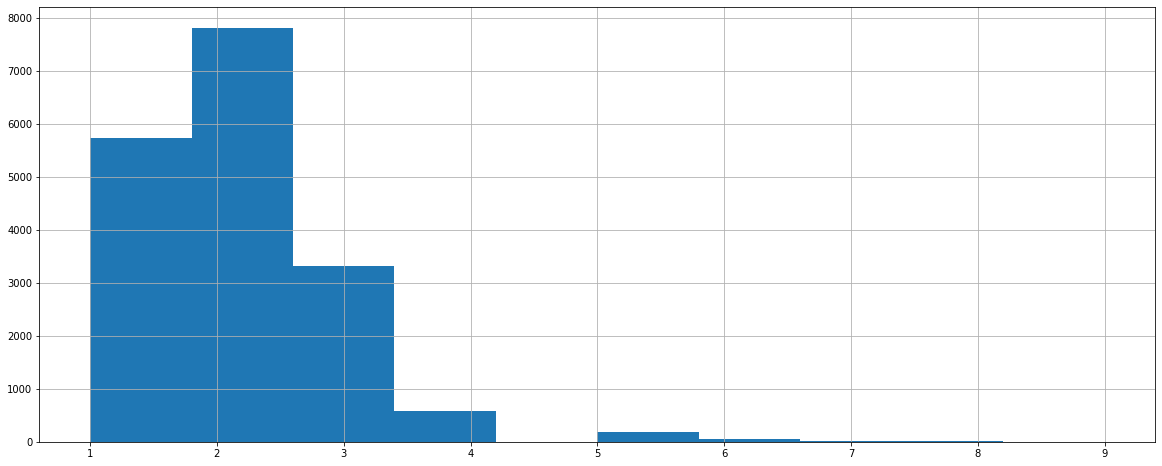

In [167]:
i = (i + 1) % len(columns)
next_histogram()

30 bathrooms_model float64 11


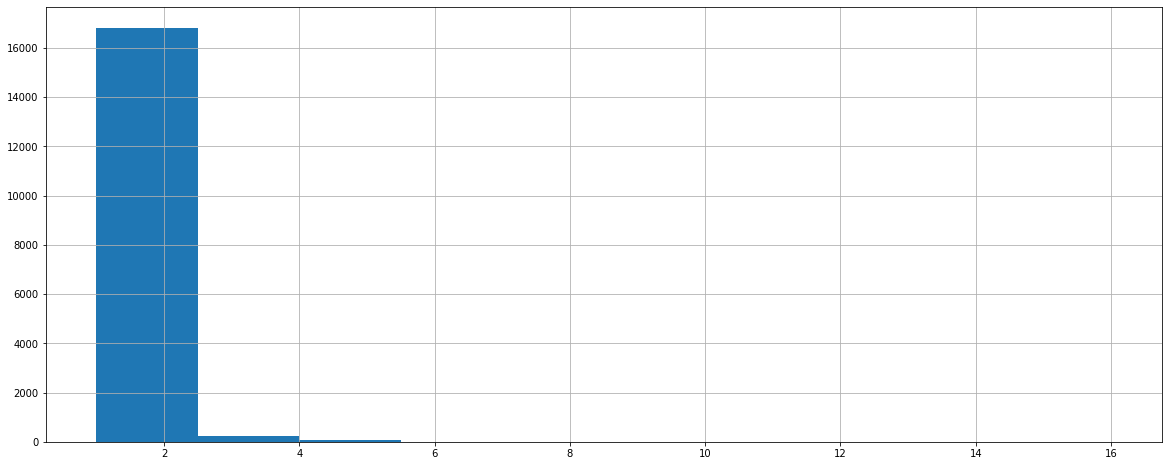

In [168]:
i = (i + 1) % len(columns)
next_histogram()

skipping transactionType(2): too many value types or not enough value types

32 tags object 17


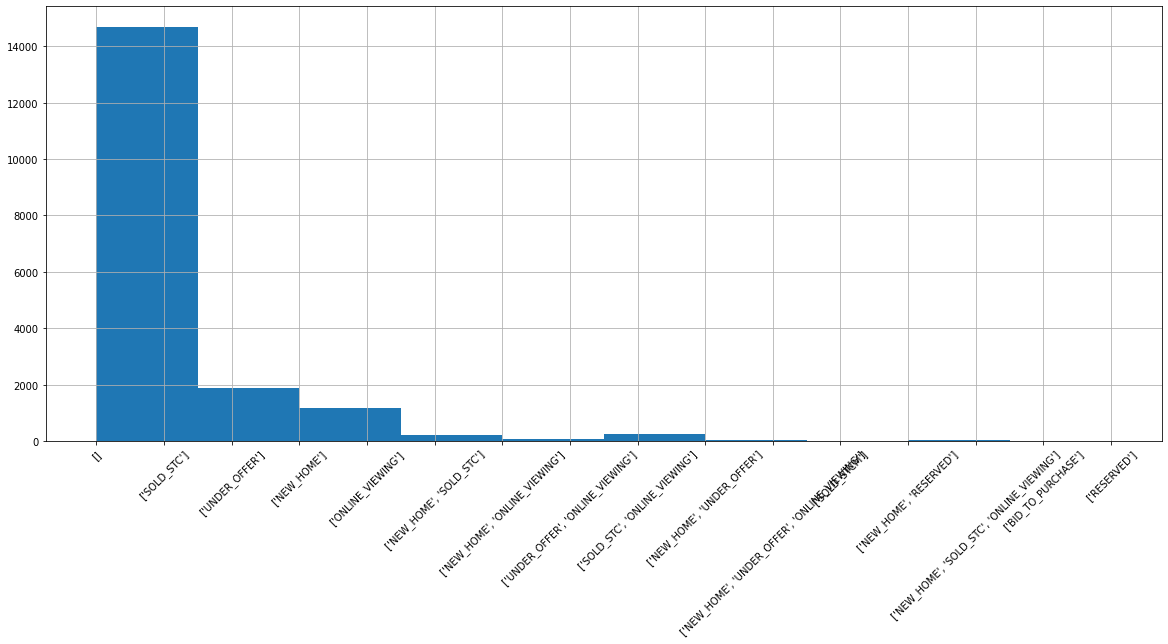

In [169]:
i = (i + 1) % len(columns)
next_histogram()

skipping feesApply(1)/lettings(1)/infoReelItems(2355): too many value types or not enough value types

36 soldPropertyType object 6


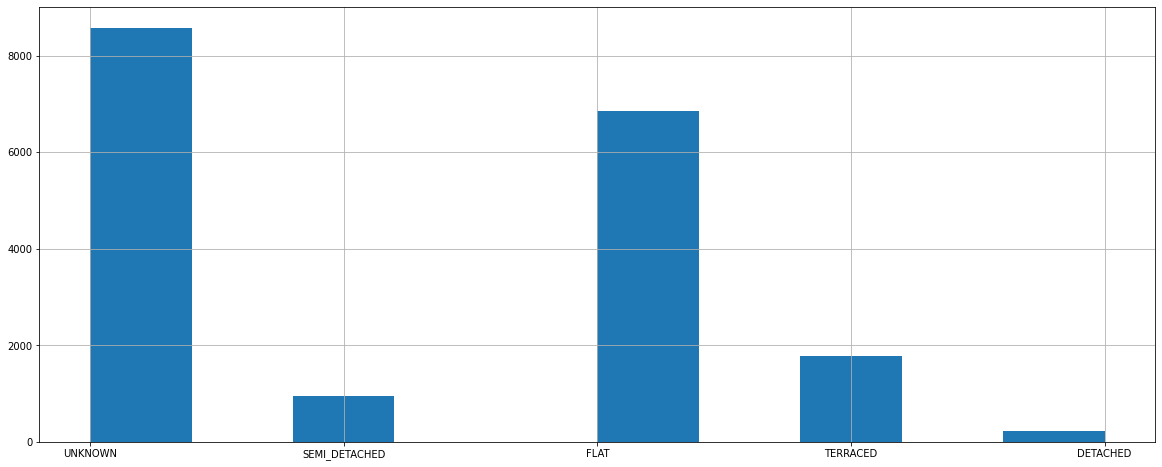

In [170]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider(1): too many value types or not enough value types

38 propertySubType object 33


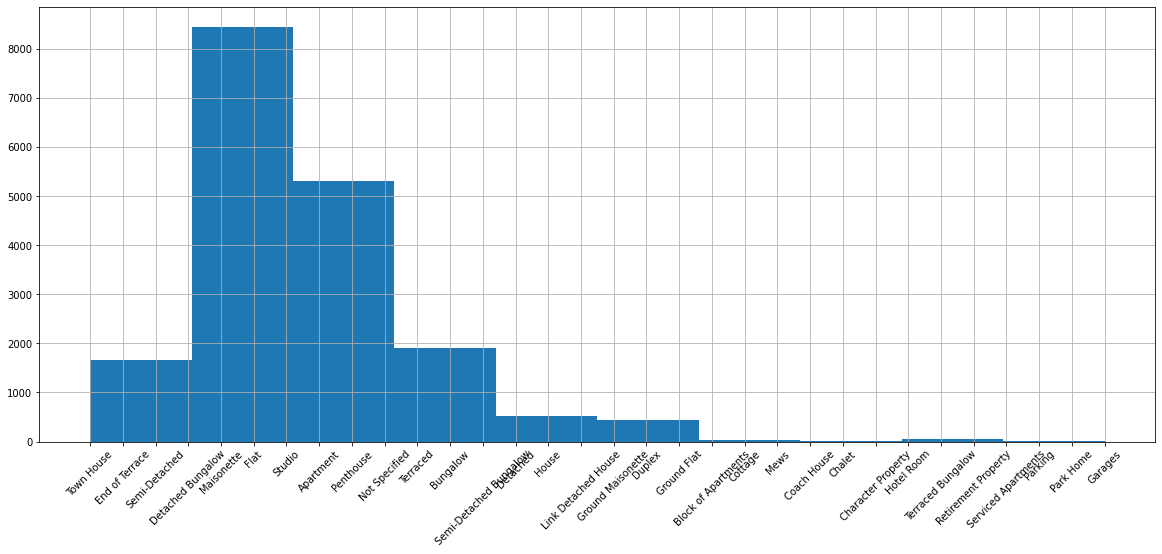

In [171]:
i = (i + 1) % len(columns)
next_histogram()

skipping businessForSale(2)/commercial(2)/commercialUseClasses(2)/affordableBuyingScheme(1): too many value types or not enough value types

43 status.published object 3
failed to load graph


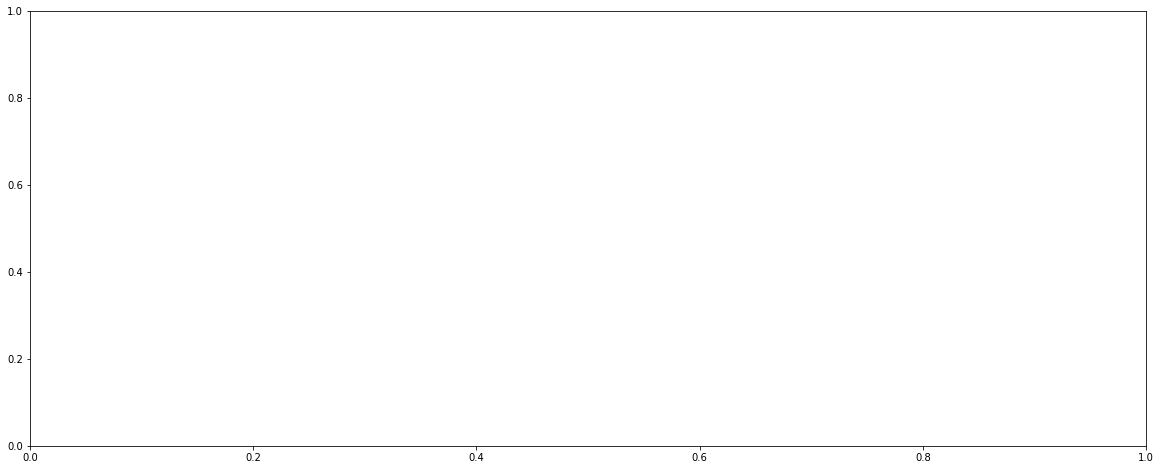

In [172]:
i = (i + 1) % len(columns)
next_histogram()

44 status.archived object 3
failed to load graph


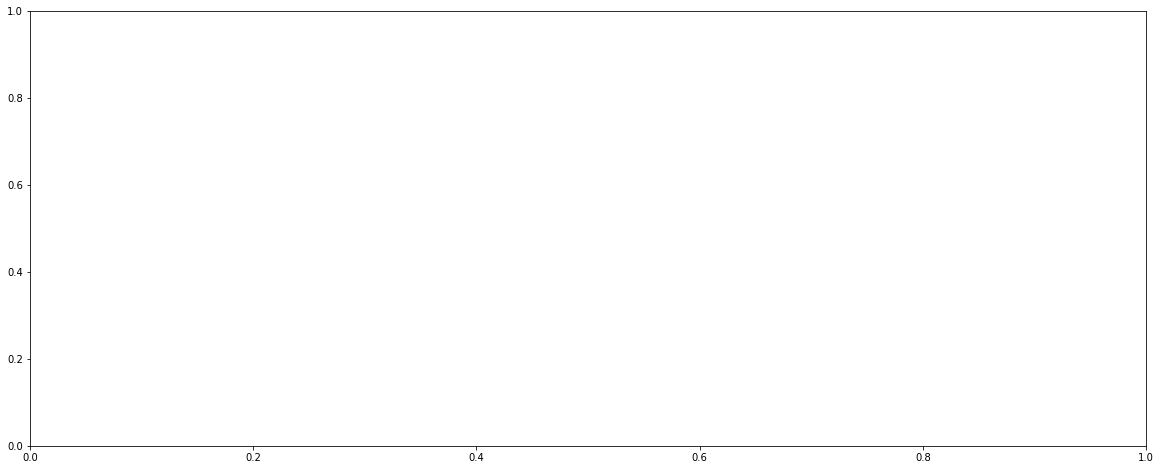

In [173]:
i = (i + 1) % len(columns)
next_histogram()

skipping text.description(18156)/text.propertyPhrase(122)/text.shareText(122)/text.shareDescription(18100)/text.pageTitle(16245)/text.shortDescription(122)/prices.primaryPrice(1033)/prices.secondaryPrice(1): too many value types or not enough value types

53 prices.displayPriceQualifier object 9


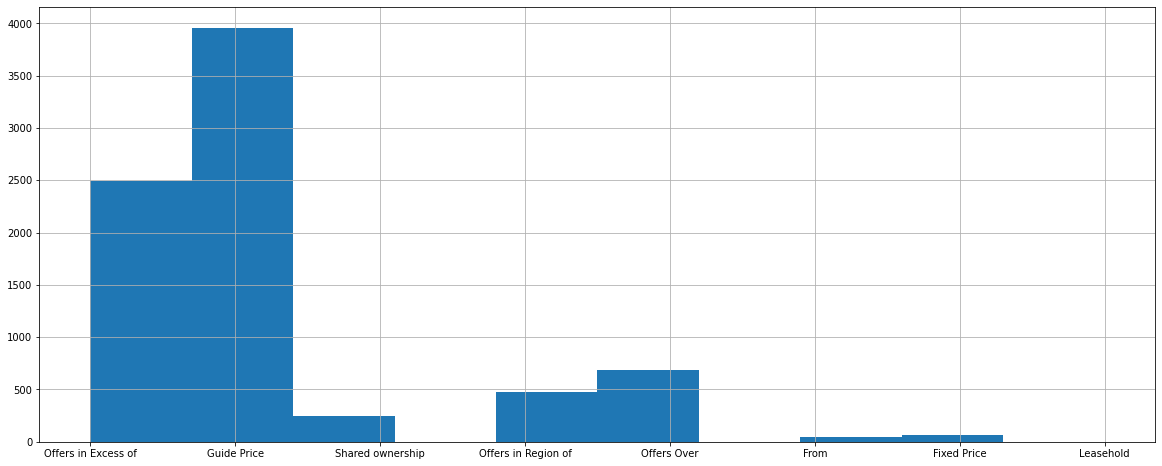

In [174]:
i = (i + 1) % len(columns)
next_histogram()

skipping prices.pricePerSqFt(2440)/prices.message(1)/prices.exchangeRate(1)/address.displayAddress(14587)/address.countryCode(2)/address.deliveryPointId(11423)/address.ukCountry(2)/address.outcode(222)/address.incode(3313)/location.latitude(15330)/location.longitude(15859)/location.circleRadiusOnMap(2)/location.zoomLevel(2): too many value types or not enough value types

67 location.pinType object 3


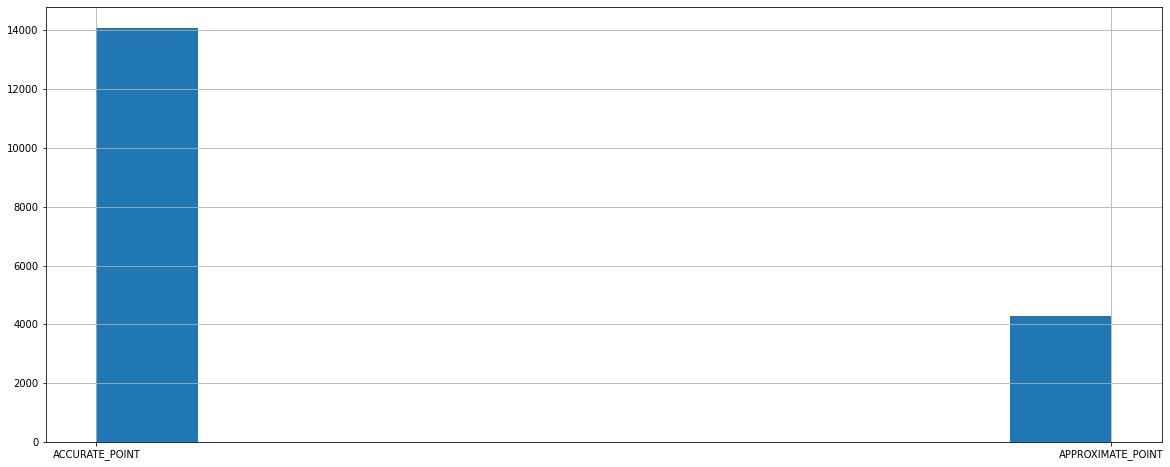

In [175]:
i = (i + 1) % len(columns)
next_histogram()

skipping location.showMap(2)/misInfo.branchId(2006): too many value types or not enough value types

70 misInfo.offerAdvertStampTypeId float64 28


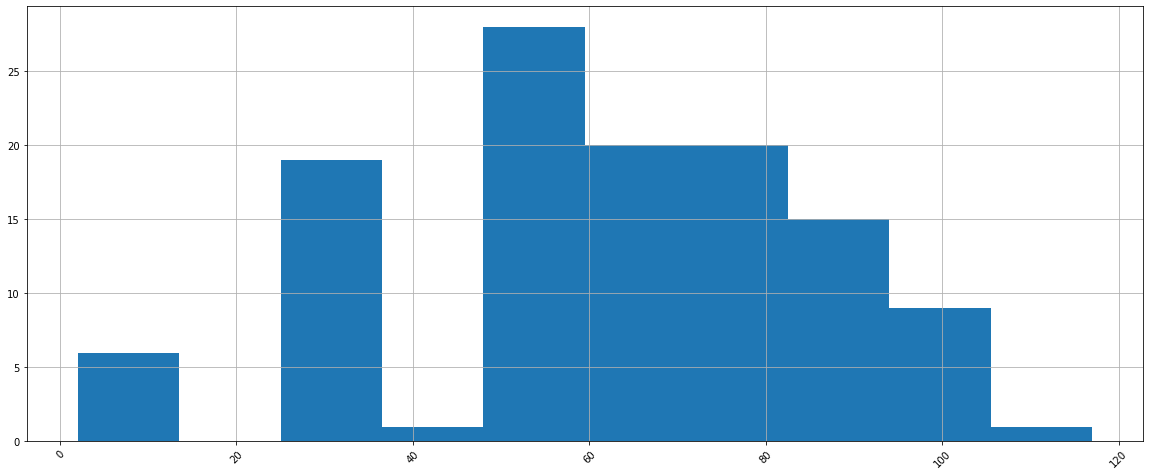

In [176]:
i = (i + 1) % len(columns)
next_histogram()

71 misInfo.premiumDisplay object 3
failed to load graph


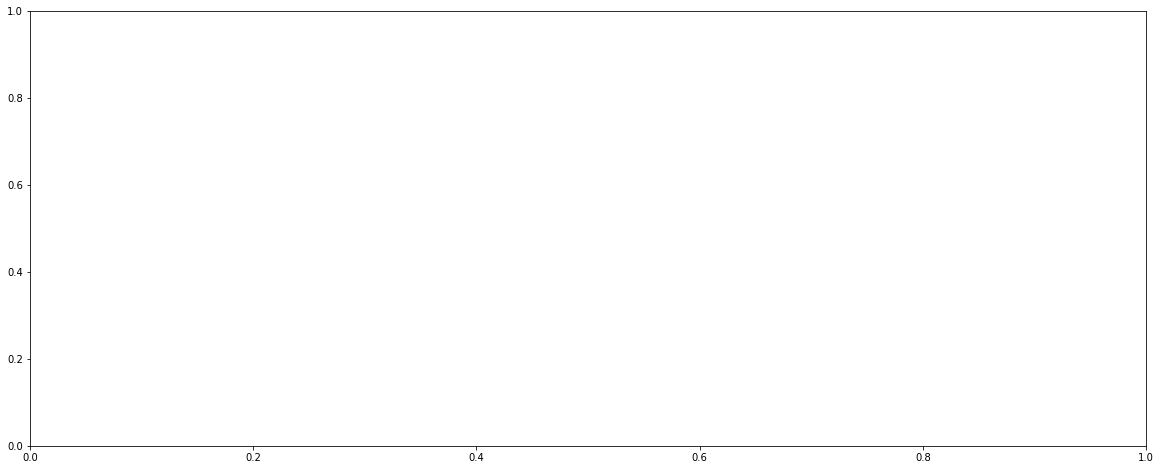

In [177]:
i = (i + 1) % len(columns)
next_histogram()

skipping misInfo.premiumDisplayStampId(87): too many value types or not enough value types

73 misInfo.brandPlus object 3
failed to load graph


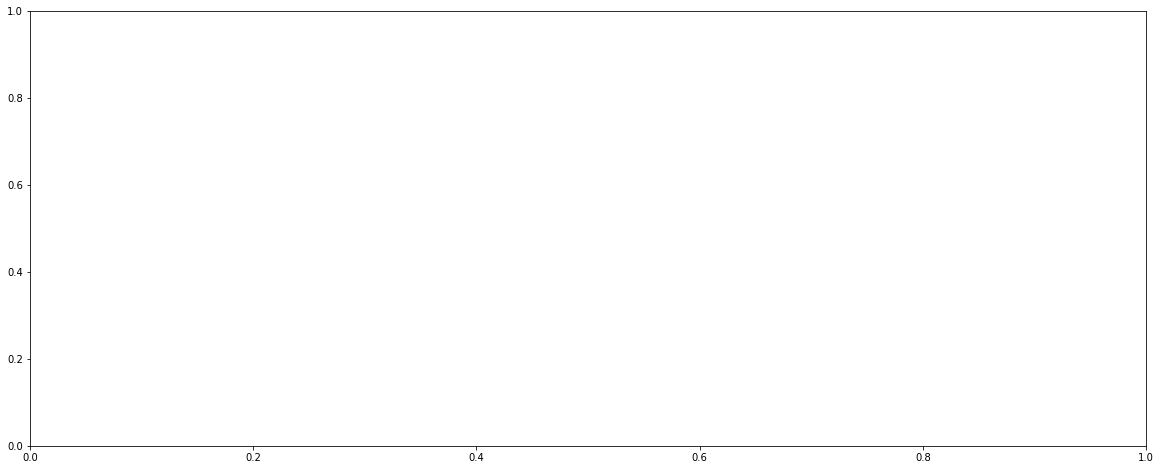

In [178]:
i = (i + 1) % len(columns)
next_histogram()

74 misInfo.featuredProperty object 3
failed to load graph


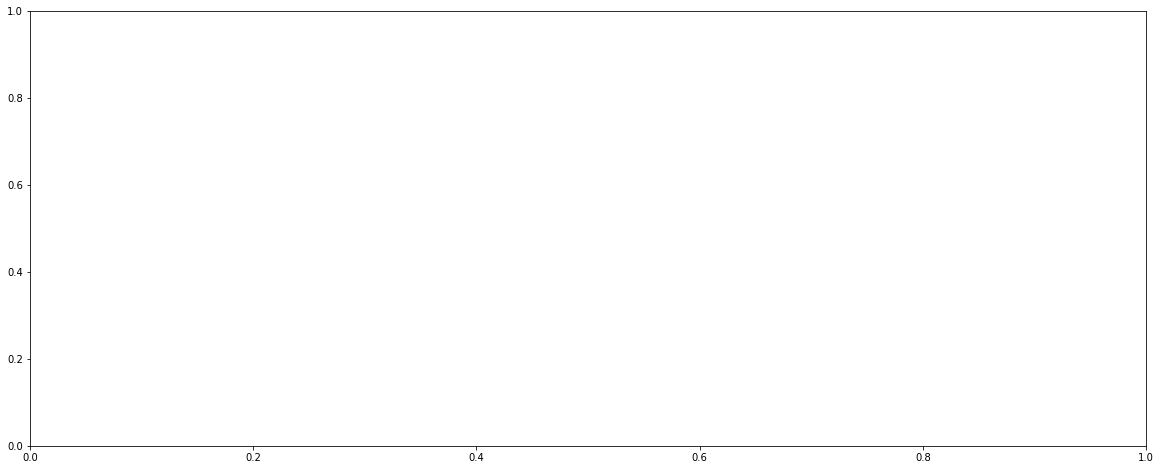

In [179]:
i = (i + 1) % len(columns)
next_histogram()

75 dfpAdInfo.channel object 3


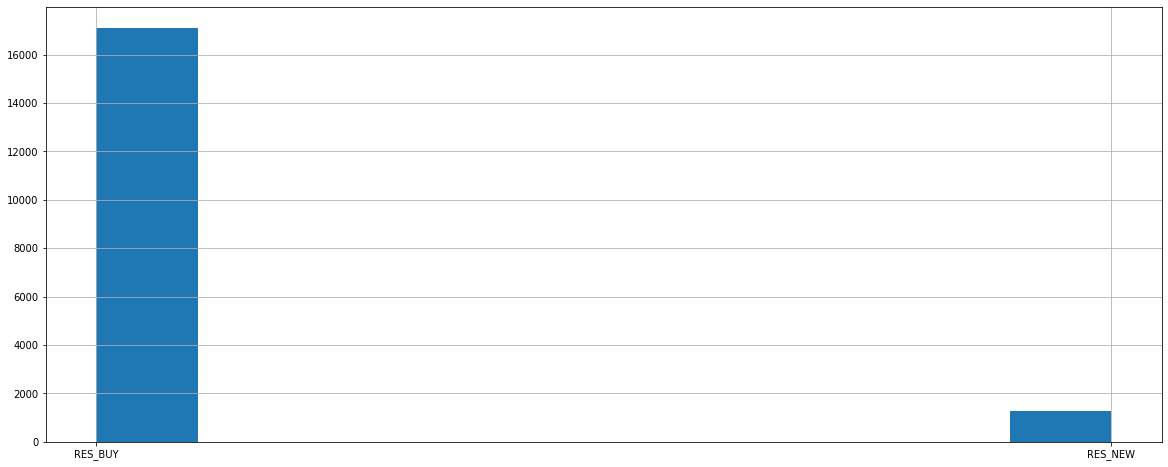

In [180]:
i = (i + 1) % len(columns)
next_histogram()

skipping dfpAdInfo.targeting(18376)/listingHistory.listingUpdateReason(1049)/contactInfo.contactMethod(2)/contactInfo.telephoneNumbers.localNumber(2000)/contactInfo.telephoneNumbers.internationalNumber(1)/contactInfo.telephoneNumbers.disclaimerText(1)/contactInfo.telephoneNumbers.disclaimerTitle(1)/contactInfo.telephoneNumbers.disclaimerDescription(1): too many value types or not enough value types

84 tenure.tenureType object 5


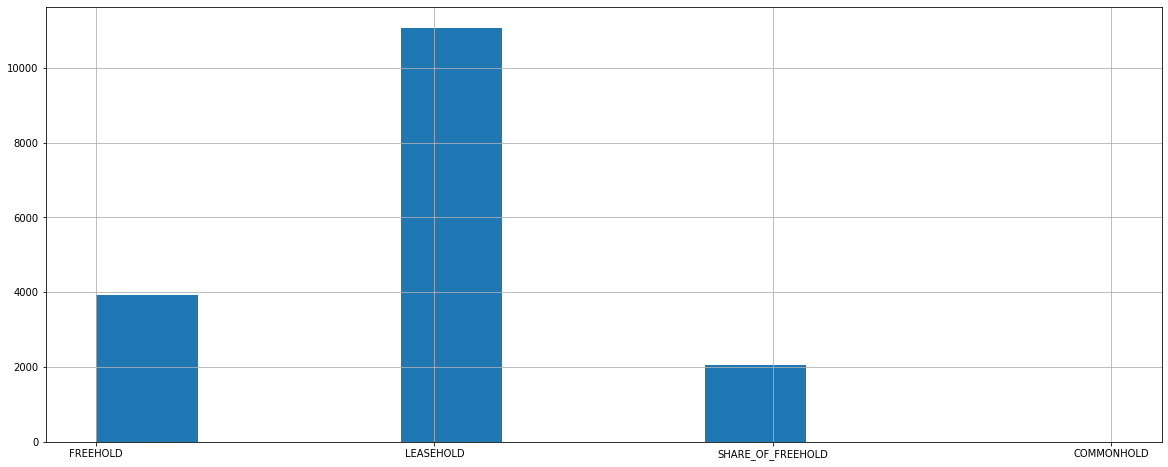

In [181]:
i = (i + 1) % len(columns)
next_histogram()

skipping tenure.yearsRemainingOnLease(194)/tenure.message(300): too many value types or not enough value types

87 sharedOwnership.sharedOwnership object 3
failed to load graph


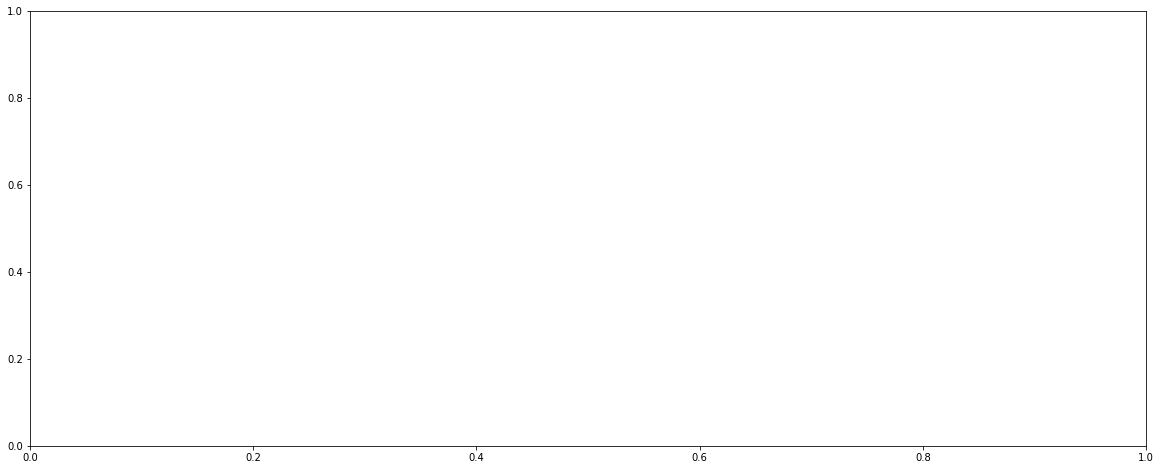

In [182]:
i = (i + 1) % len(columns)
next_histogram()

88 sharedOwnership.ownershipPercentage float64 5


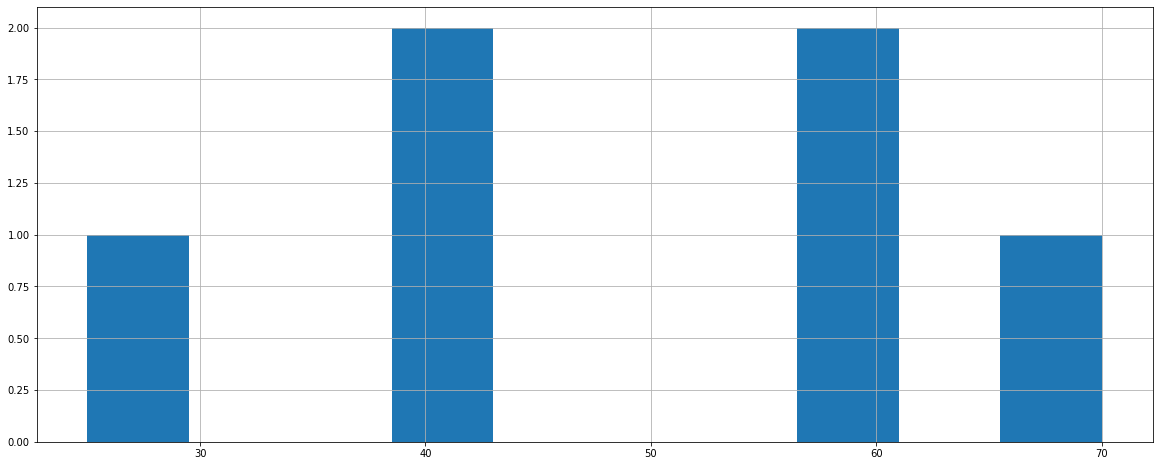

In [183]:
i = (i + 1) % len(columns)
next_histogram()

skipping sharedOwnership.rentPrice(2): too many value types or not enough value types

90 sharedOwnership.rentFrequency object 3


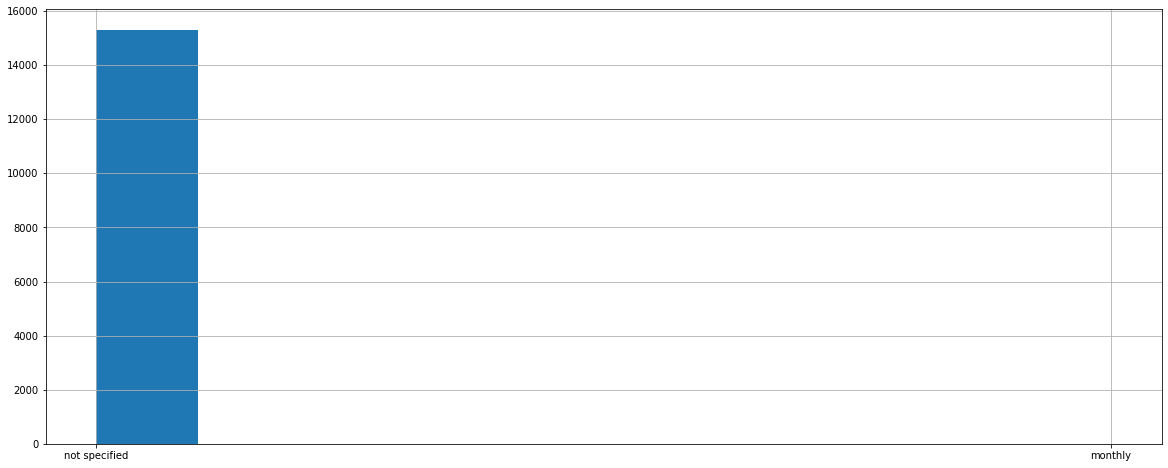

In [184]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.councilTaxExempt(2): too many value types or not enough value types

92 livingCosts.councilTaxIncluded object 3
failed to load graph


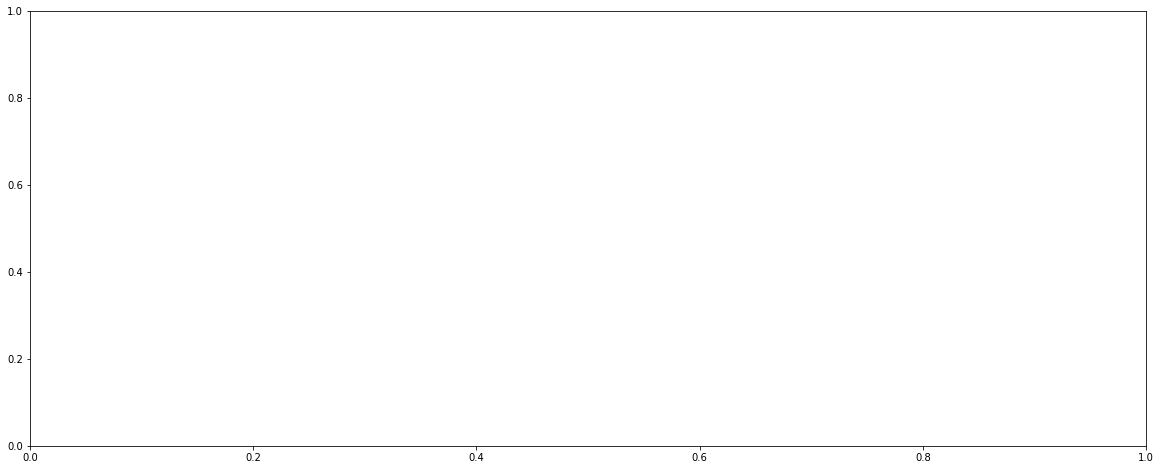

In [185]:
i = (i + 1) % len(columns)
next_histogram()

93 livingCosts.annualGroundRent float64 22


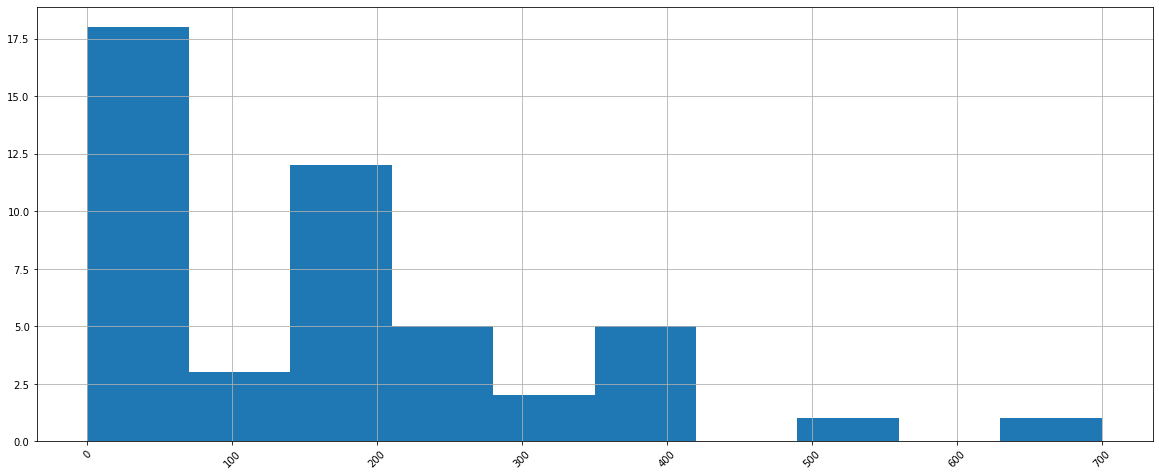

In [186]:
i = (i + 1) % len(columns)
next_histogram()

94 livingCosts.groundRentReviewPeriodInYears float64 5


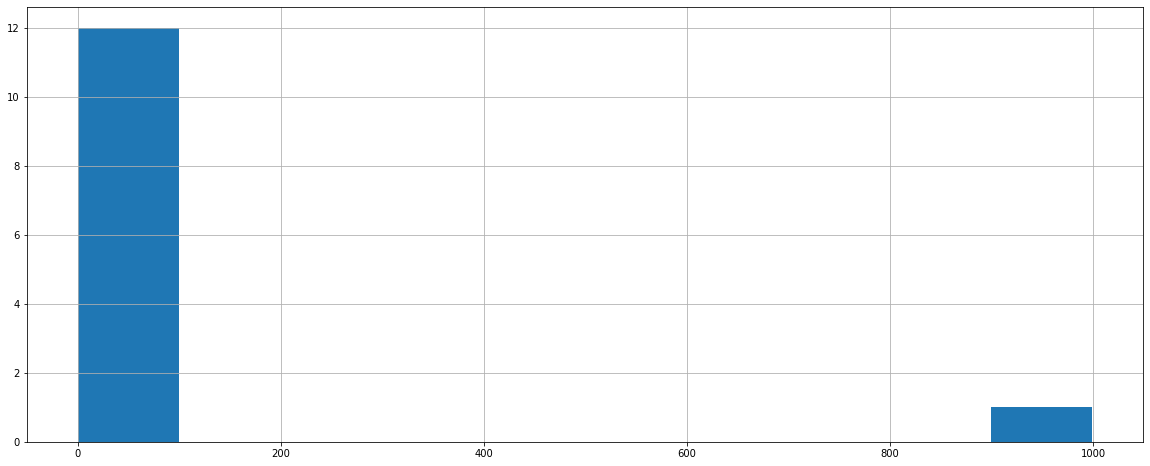

In [187]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.groundRentPercentageIncrease(2): too many value types or not enough value types

96 livingCosts.annualServiceCharge float64 45


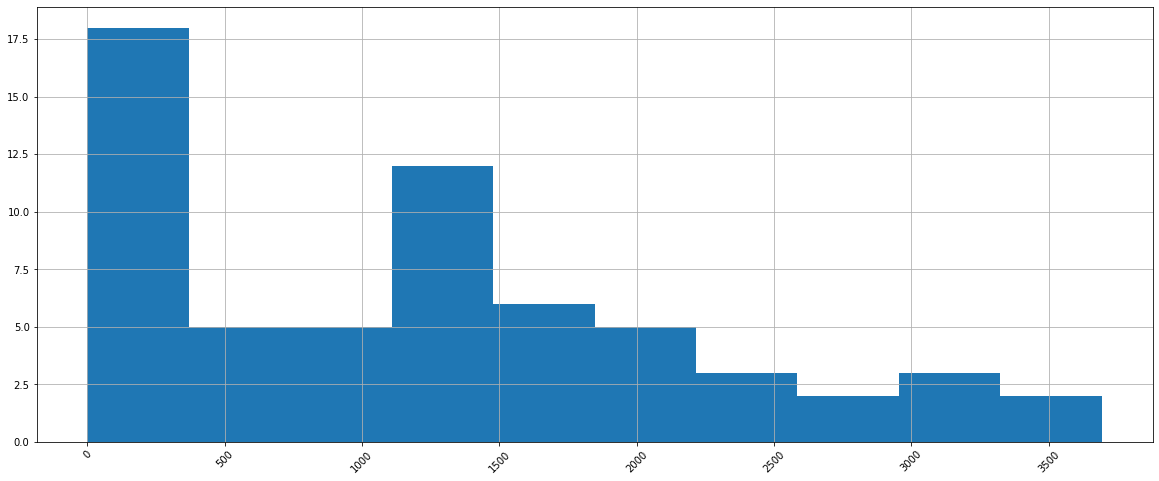

In [188]:
i = (i + 1) % len(columns)
next_histogram()

97 livingCosts.councilTaxBand object 10


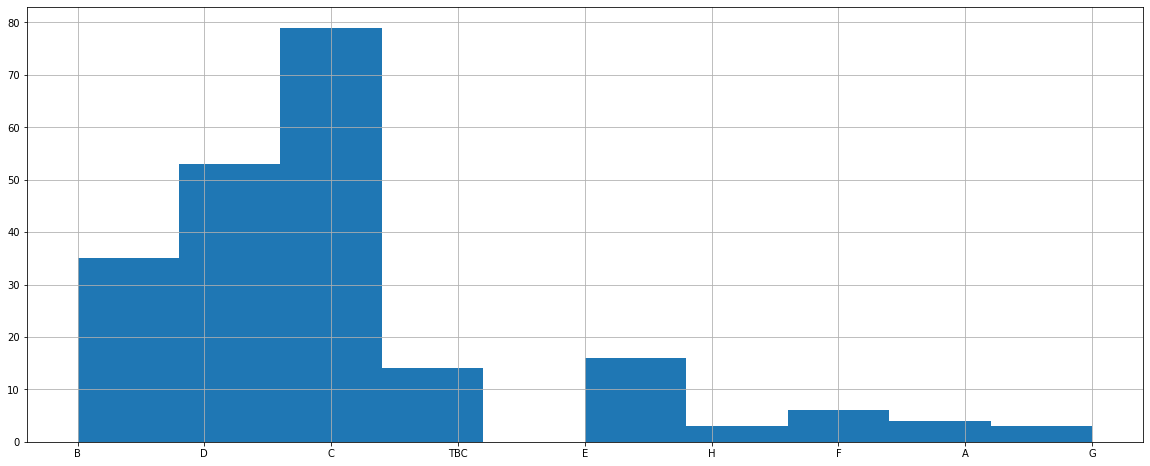

In [189]:
i = (i + 1) % len(columns)
next_histogram()

skipping livingCosts.domesticRates(2): too many value types or not enough value types

99 auctionProvider.endDate object 7


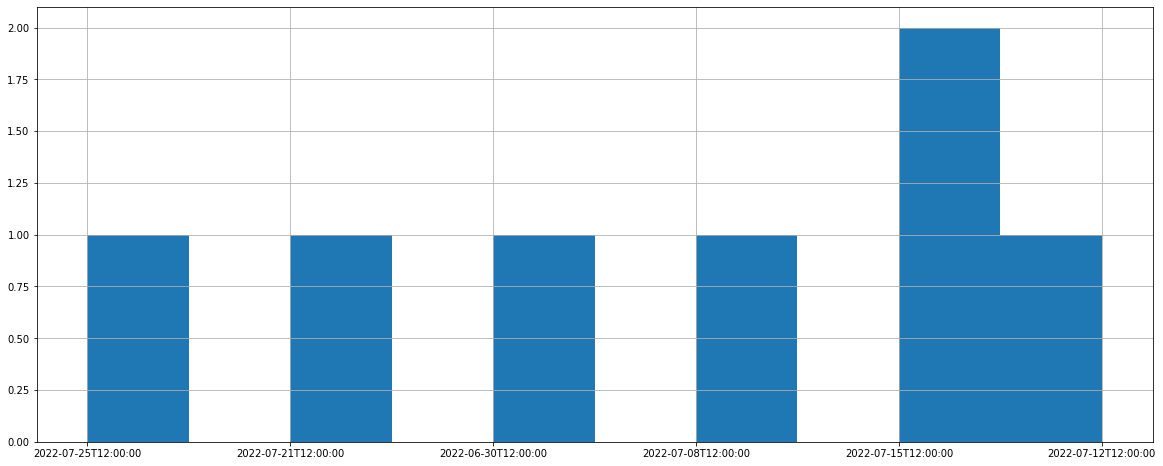

In [190]:
i = (i + 1) % len(columns)
next_histogram()

100 auctionProvider.auctionTimeRemaining object 8


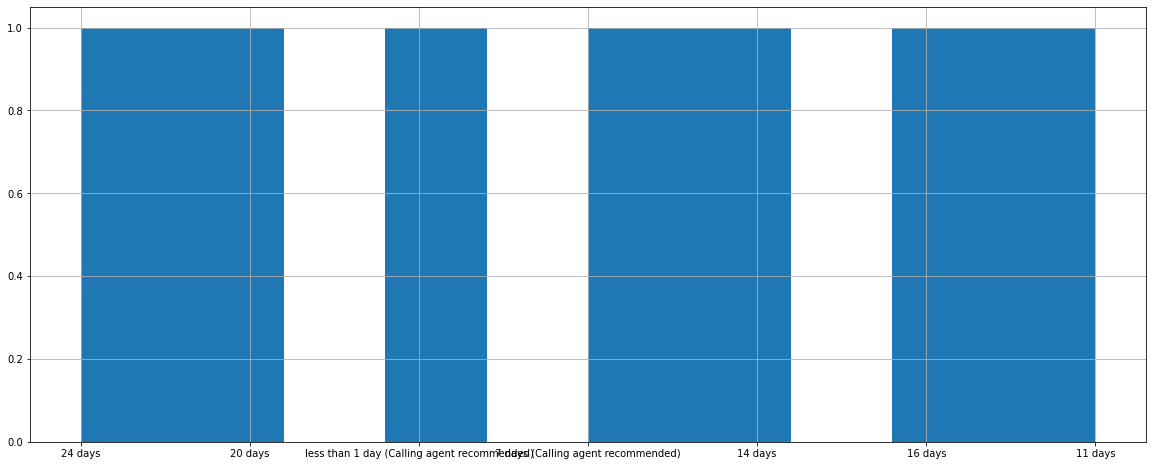

In [191]:
i = (i + 1) % len(columns)
next_histogram()

skipping auctionProvider.bid(1)/date_scraped_meta(20075): too many value types or not enough value types

103 analyticsBranch.agentType object 5


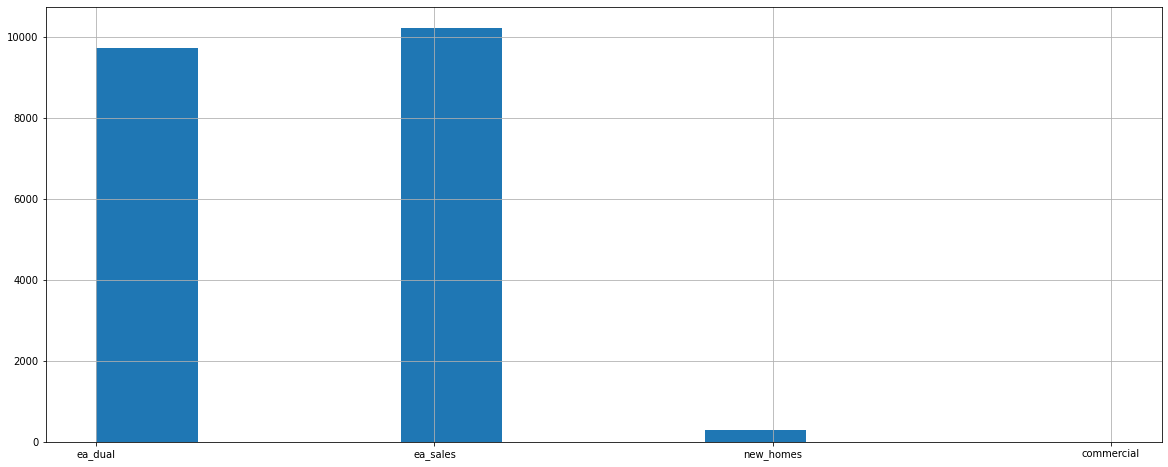

In [192]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsBranch.branchId(2166)/analyticsBranch.branchName(780)/analyticsBranch.branchPostcode(1)/analyticsBranch.brandName(1209)/analyticsBranch.companyName(1151)/analyticsBranch.companyTradingName(854): too many value types or not enough value types

110 analyticsBranch.companyType object 6


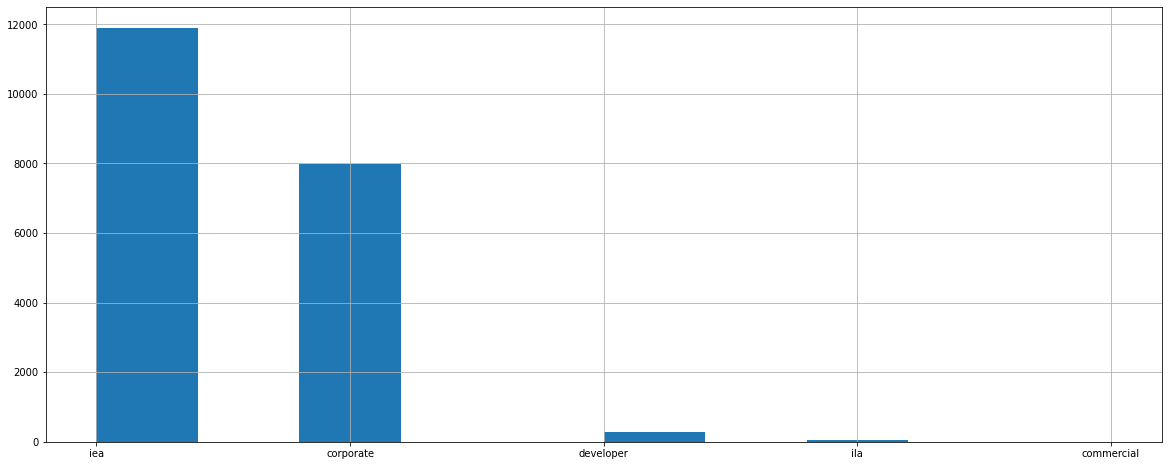

In [193]:
i = (i + 1) % len(columns)
next_histogram()

111 analyticsBranch.pageType object 3


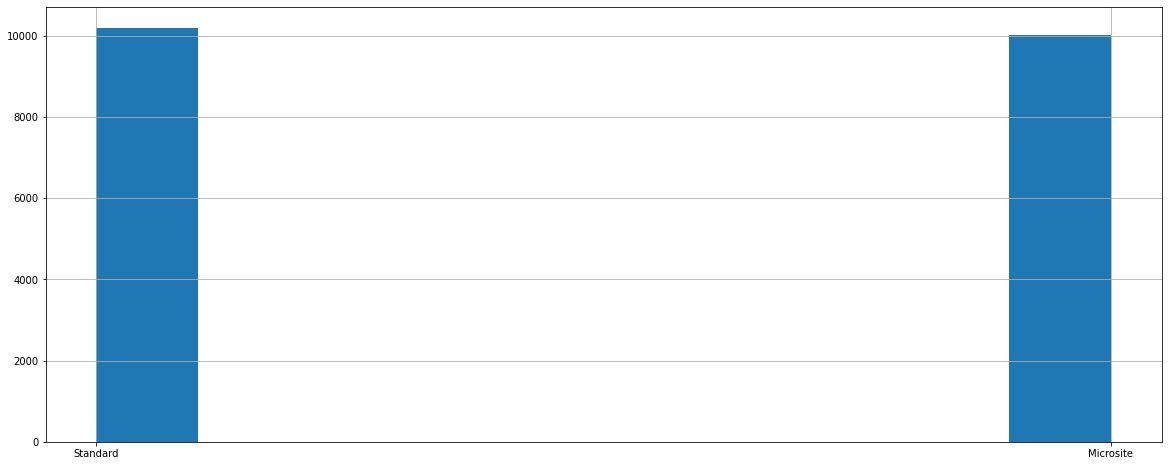

In [194]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.added(765): too many value types or not enough value types

113 analyticsProperty.auctionOnly object 3
failed to load graph


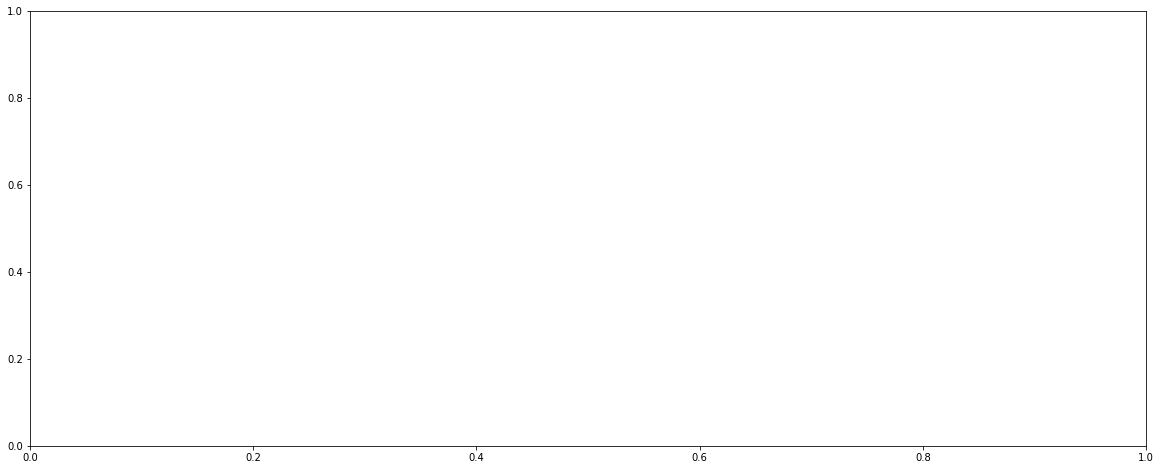

In [195]:
i = (i + 1) % len(columns)
next_histogram()

114 analyticsProperty.beds float64 11


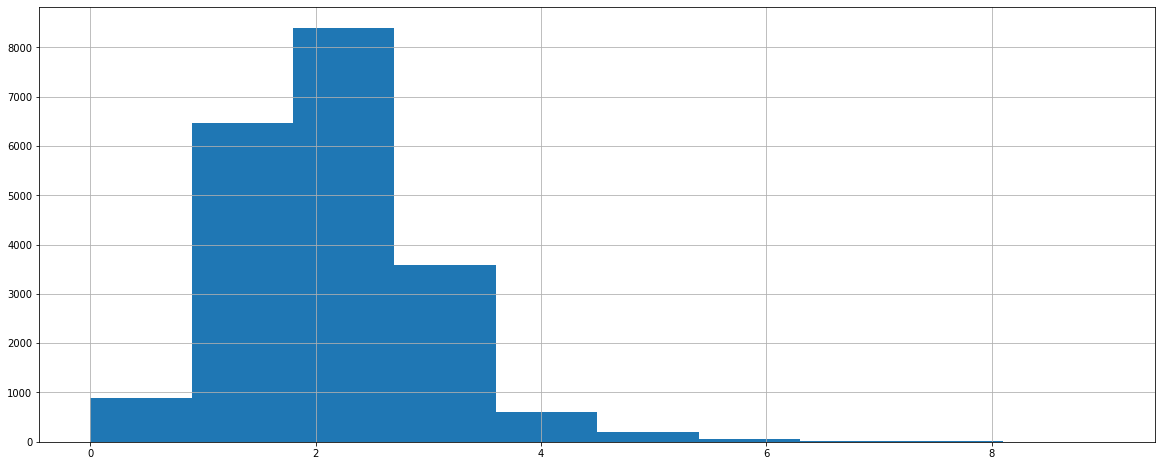

In [196]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.businessForSale(2)/analyticsProperty.country(2)/analyticsProperty.currency(2): too many value types or not enough value types

118 analyticsProperty.floorplanCount float64 10


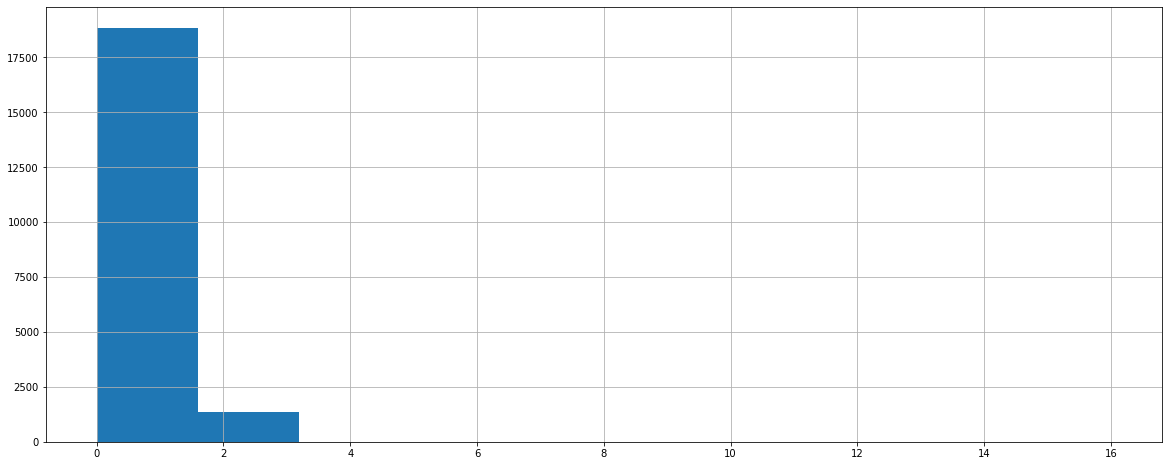

In [197]:
i = (i + 1) % len(columns)
next_histogram()

119 analyticsProperty.furnishedType object 6


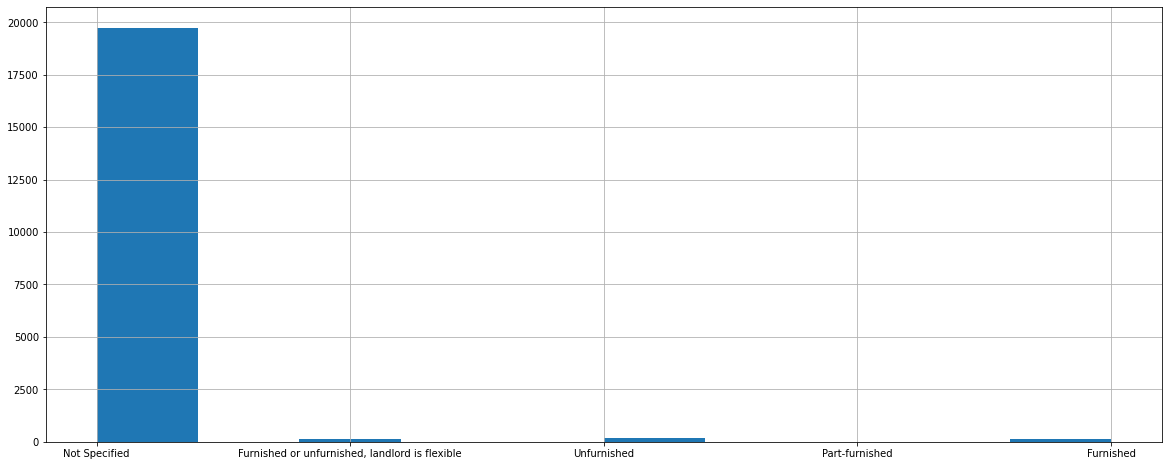

In [198]:
i = (i + 1) % len(columns)
next_histogram()

120 analyticsProperty.hasOnlineViewing object 3
failed to load graph


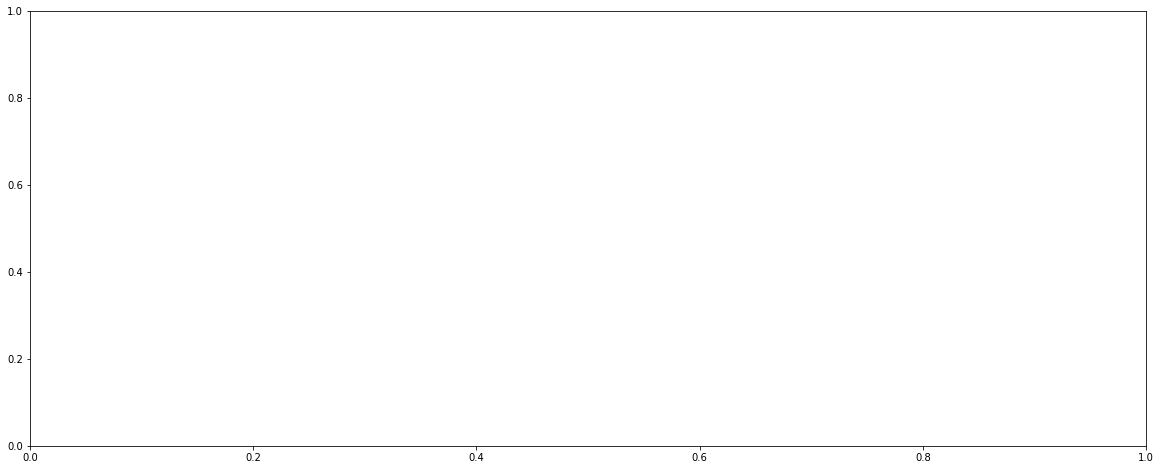

In [199]:
i = (i + 1) % len(columns)
next_histogram()

121 analyticsProperty.imageCount float64 49


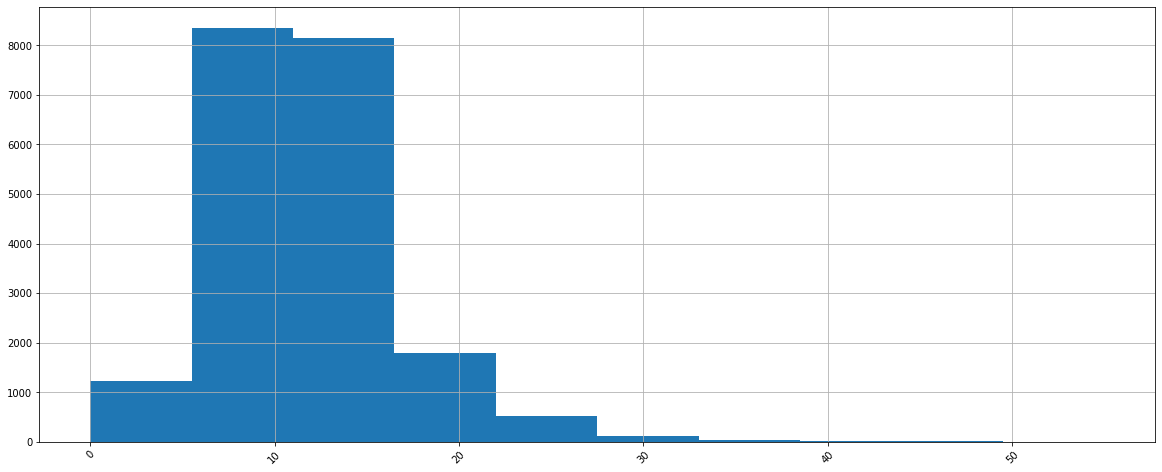

In [200]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.latitude(16804)/analyticsProperty.longitude(17415)/analyticsProperty.letAgreed(2)/analyticsProperty.lettingType(2)/analyticsProperty.maxSizeAc(1207)/analyticsProperty.maxSizeFt(1020)/analyticsProperty.minSizeAc(1204)/analyticsProperty.minSizeFt(1017): too many value types or not enough value types

130 analyticsProperty.ownership object 3


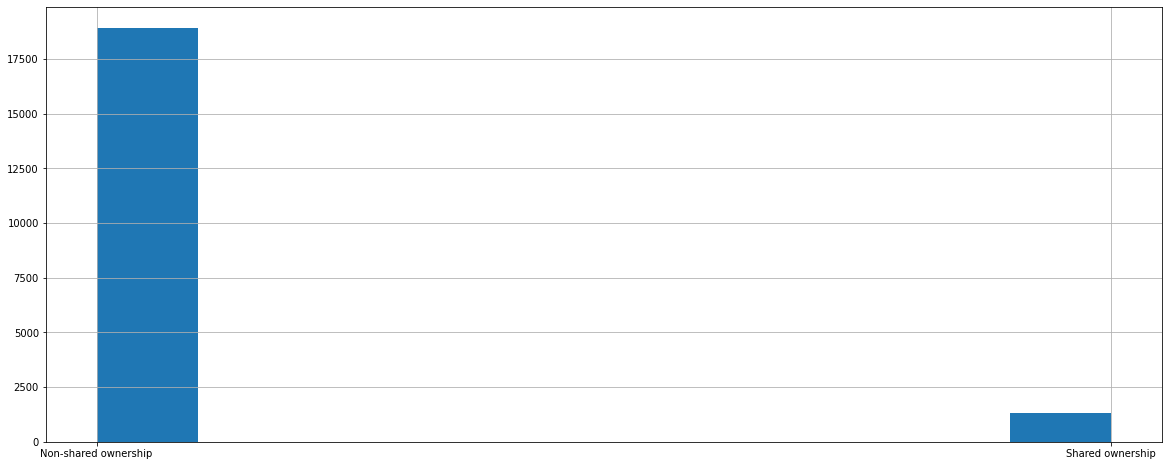

In [201]:
i = (i + 1) % len(columns)
next_histogram()

131 analyticsProperty.preOwned object 3


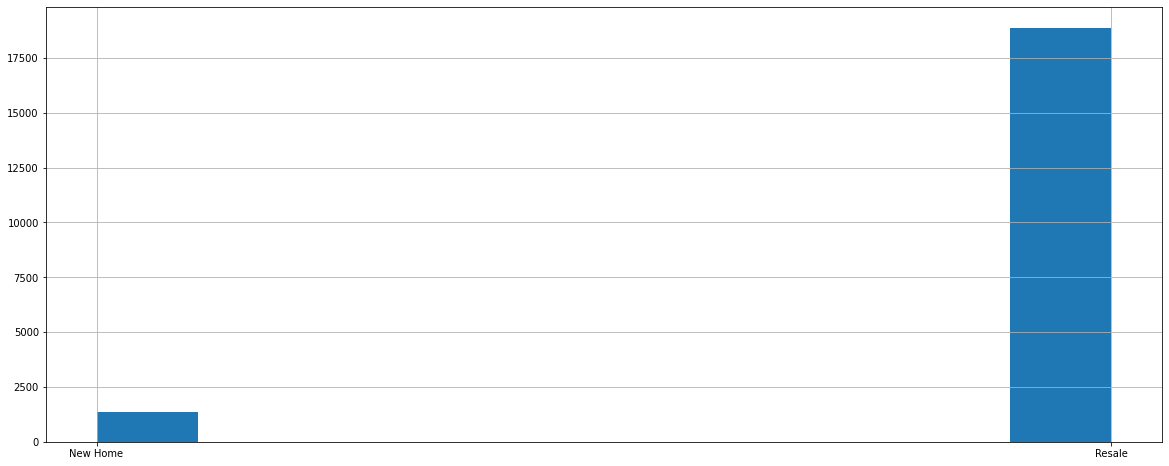

In [202]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.price(1070): too many value types or not enough value types

133 analyticsProperty.priceQualifier object 10


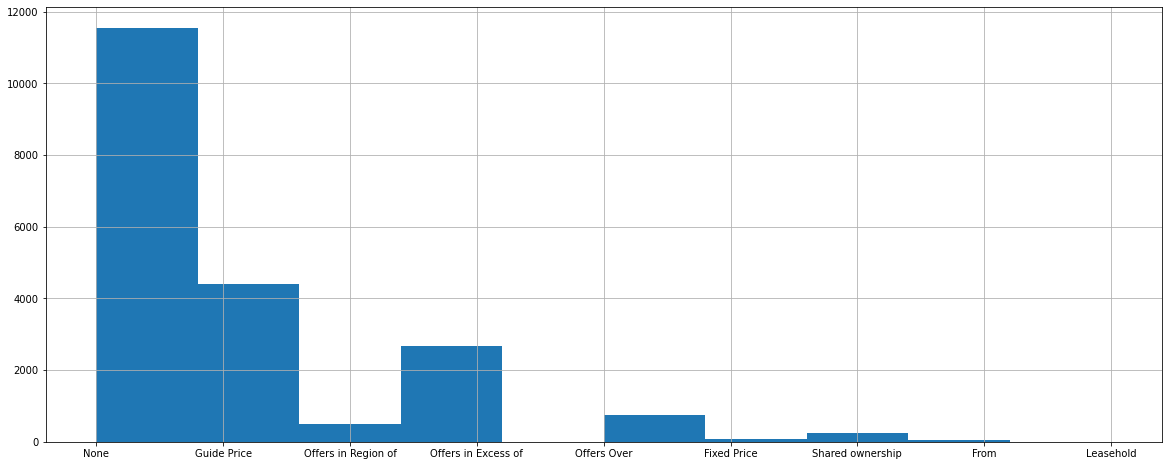

In [203]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.propertyId(20227): too many value types or not enough value types

135 analyticsProperty.propertySubType object 33


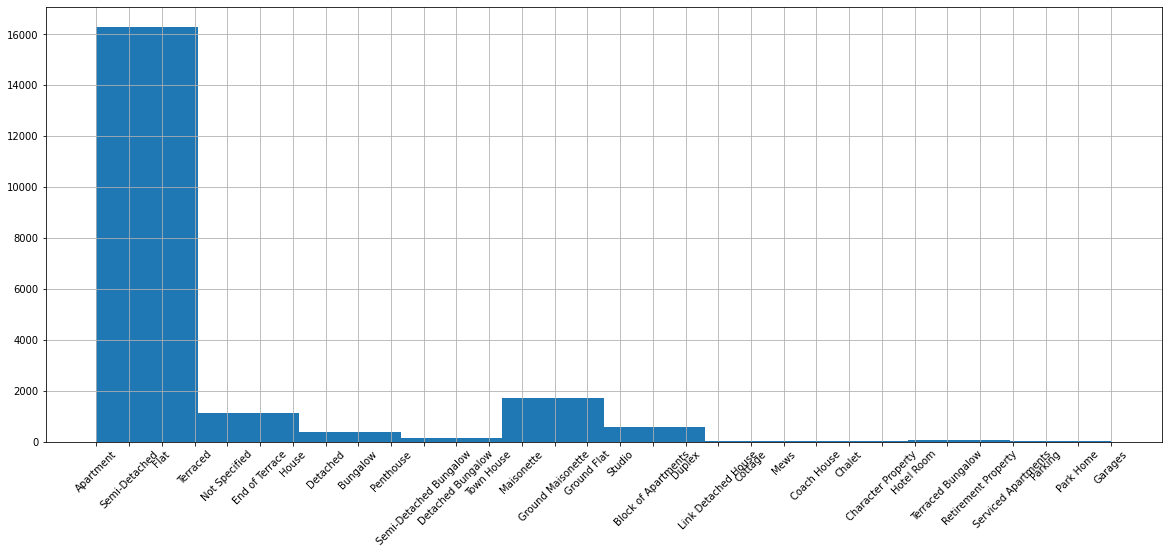

In [204]:
i = (i + 1) % len(columns)
next_histogram()

136 analyticsProperty.propertyType object 9


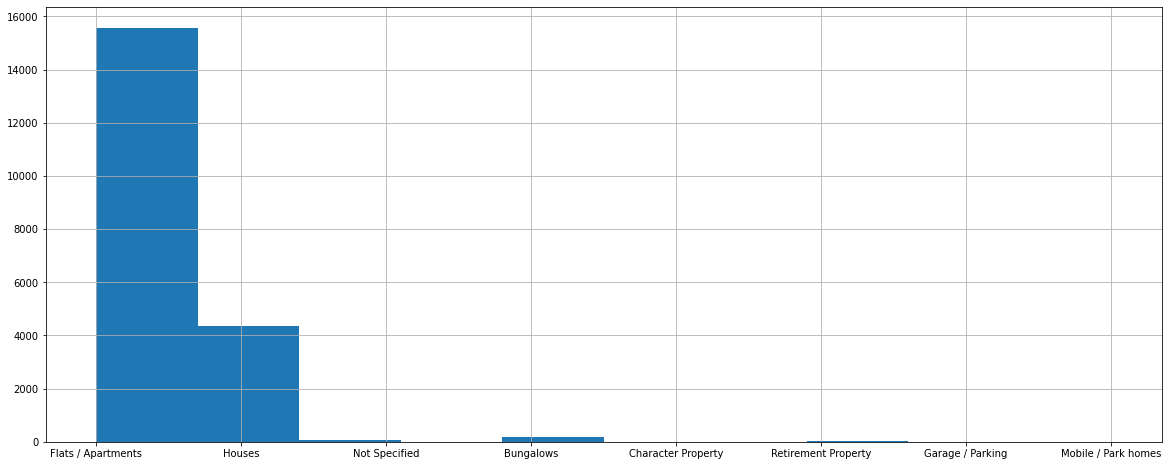

In [205]:
i = (i + 1) % len(columns)
next_histogram()

137 analyticsProperty.retirement object 3
failed to load graph


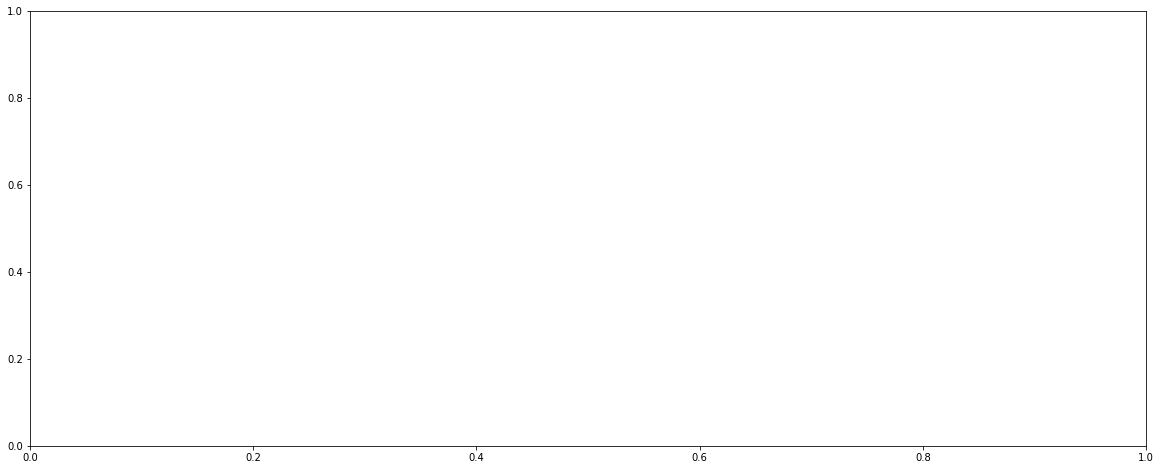

In [206]:
i = (i + 1) % len(columns)
next_histogram()

skipping analyticsProperty.selectedCurrency(1)/analyticsProperty.selectedPrice(1): too many value types or not enough value types

140 analyticsProperty.soldSTC object 3
failed to load graph


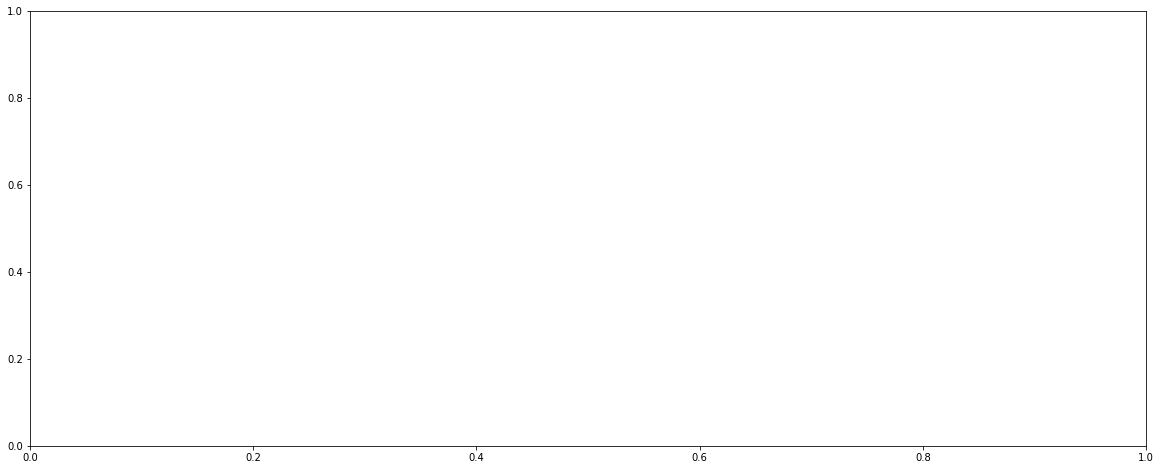

In [207]:
i = (i + 1) % len(columns)
next_histogram()

141 analyticsProperty.videoProvider object 4


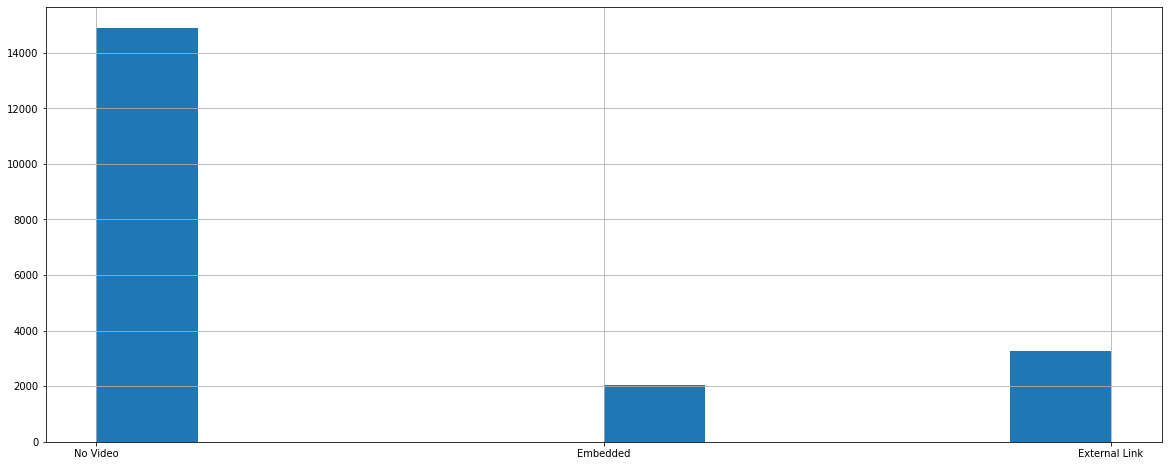

In [208]:
i = (i + 1) % len(columns)
next_histogram()

142 analyticsProperty.viewType object 3


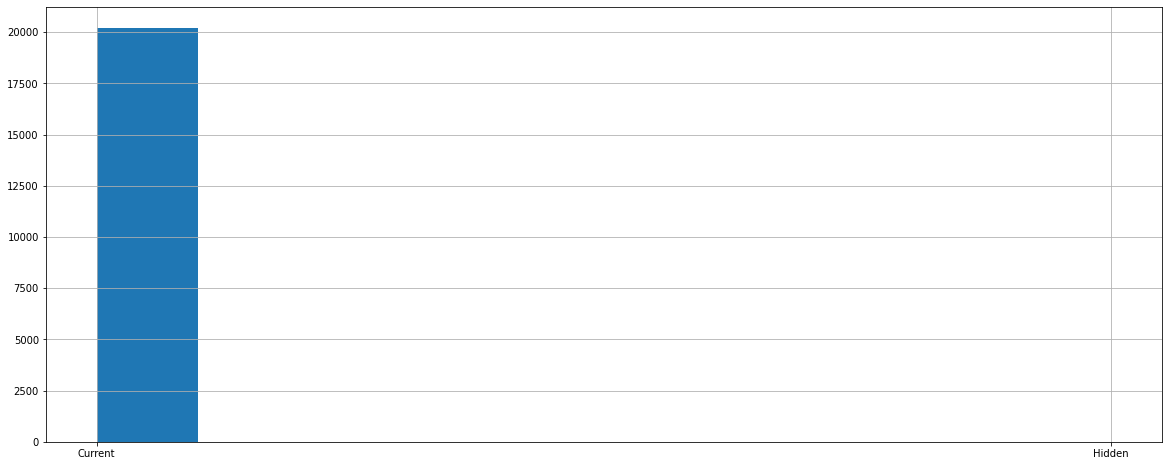

In [209]:
i = (i + 1) % len(columns)
next_histogram()

skipping Unnamed: 46(1): too many value types or not enough value types

144 floorplan_count float64 17


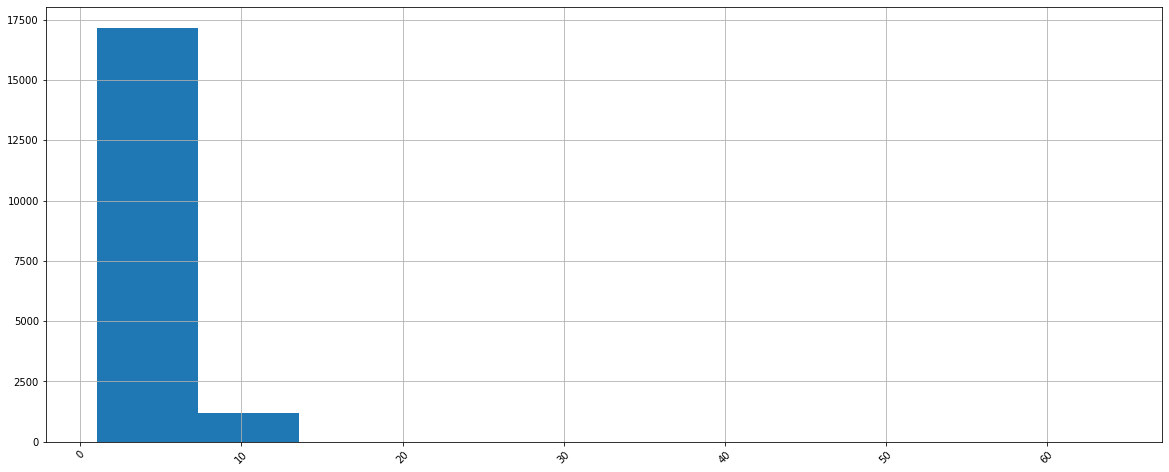

In [210]:
i = (i + 1) % len(columns)
next_histogram()

145 borough_name object 25


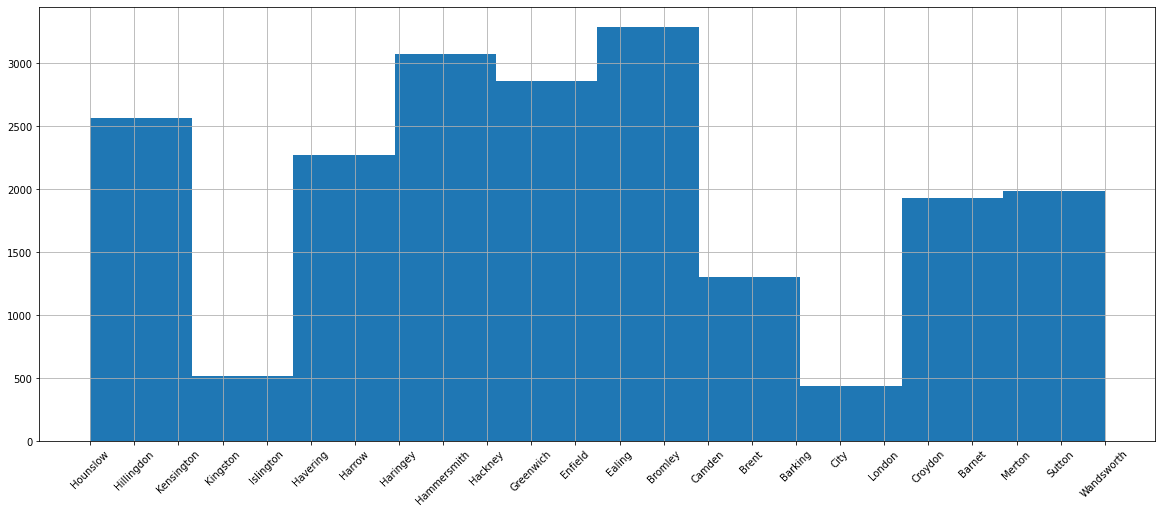

In [211]:
i = (i + 1) % len(columns)
next_histogram()

skipping Description(124)/Price(1069)/add_info(16122)/date_scraped(2002): too many value types or not enough value types

4 distance_to_any_train float64 43


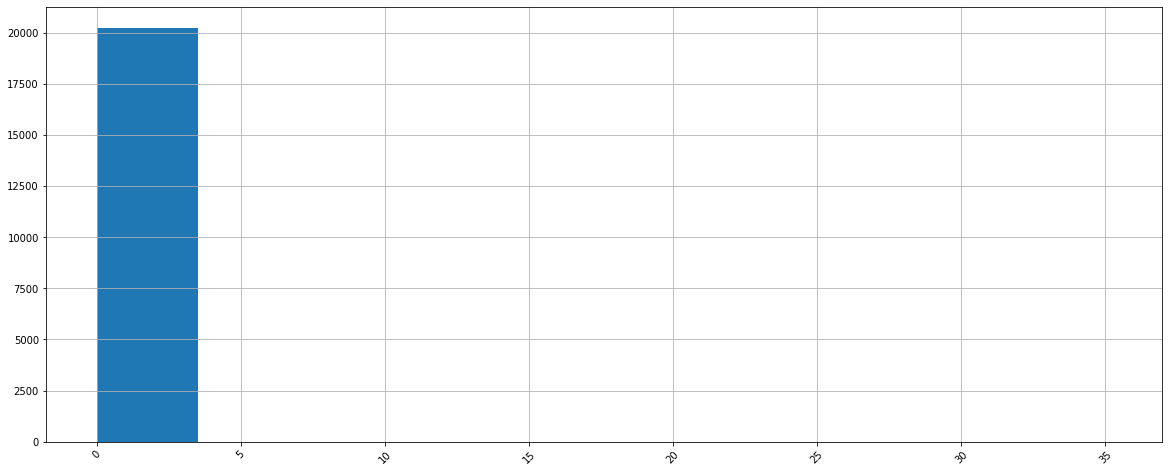

In [212]:
i = (i + 1) % len(columns)
next_histogram()